In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_master = pd.read_excel("master_file_final.xlsx")
df_appts = pd.read_excel("allapptslinac2010-2020.xlsx")


In [ ]:
start_date = '2020-01-01'
end_date = '2020-03-01'

In [ ]:
#df_emergency = df_master[(df_master['Category_x']=='Urgent 2')|(df_master['Category_x']=='Standard 3')]
df_emergency = df_master[df_master['Category_x']=='Emergency 1']
df_emergency['Year'] = df_emergency['CreatedDate'].dt.year
df_emergency['Month'] = df_emergency['CreatedDate'].dt.month
# create YearMonth column
df_emergency['dateInt']= df_emergency['Year'].astype(str) + df_emergency['Month'].astype(str).str.zfill(2)
df_emergency['YearMonth'] = pd.to_datetime(df_emergency['dateInt'], format='%Y%m')
df_emergency

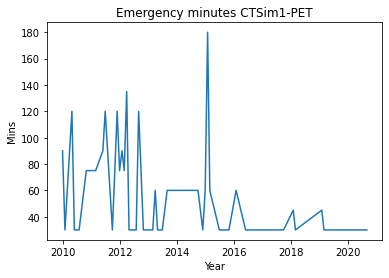

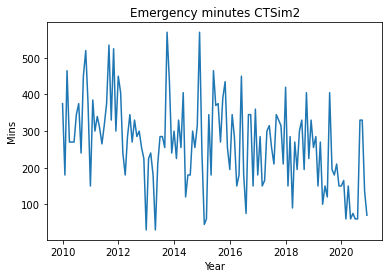

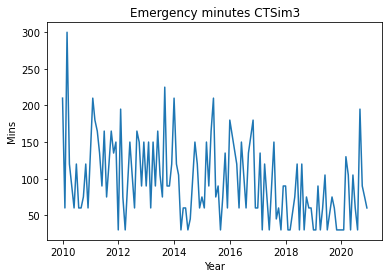

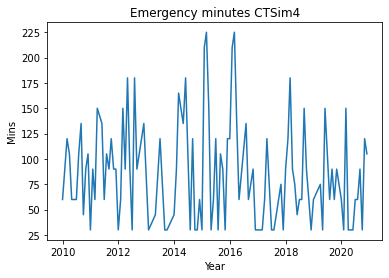

In [4]:
### CTs mins booked on each CT
df_CTmins = df_emergency.groupby([df_emergency['SimLocation'],df_emergency['YearMonth']]
                                )['SimApptDuration'].agg('sum').reset_index()
                                                                                                            
CTs = df_CTmins['SimLocation'].unique()
for u in CTs:
    y = df_CTmins[df_CTmins['SimLocation']==u]['SimApptDuration']
    x = df_CTmins[df_CTmins['SimLocation']==u]['YearMonth']

    plt.plot(x, y)
    plt.xlabel('Year')
    plt.ylabel('Mins')
    plt.title('Emergency minutes '+u)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()

In [13]:
df_CTmins

,SimLocation,YearMonth,SimApptDuration
0,CTSim1-PET,2010-01-01,90
1,CTSim1-PET,2010-02-01,30
2,CTSim1-PET,2010-05-01,120
3,CTSim1-PET,2010-06-01,30
4,CTSim1-PET,2010-07-01,30
...,...,...,...
408,CTSim4,2020-08-01,60
409,CTSim4,2020-09-01,90
410,CTSim4,2020-10-01,30
411,CTSim4,2020-11-01,120


In [5]:
df_CT_recent = df_CTmins[(df_CTmins['YearMonth']>='2018-06-01')&(df_CTmins['YearMonth']<='2018-09-01')]
df_CT_recent_tlt = df_CT_recent.groupby(['SimLocation']).agg('mean').reset_index()
df_CT_recent_tlt['dailyReserve']=df_CT_recent_tlt['SimApptDuration']/20
df_CT_recent_tlt
# total mins and daily mins to be reserved

,SimLocation,SimApptDuration,dailyReserve
0,CTSim2,255.00,12.7500
1,CTSim3,75.00,3.7500
2,CTSim4,78.75,3.9375


In [6]:
df_appts['Year'] = df_appts['ApptDate'].dt.year
df_appts['Month'] = df_appts['ApptDate'].dt.month
df_totalmins = df_appts.groupby([df_appts['MRN'],df_appts['TxUnit'],df_appts['Year'],df_appts['Month']]
                               )['Duration'].agg('sum').reset_index()
df_totalmins['Year']=df_totalmins['Year'].astype(int)
df_totalmins['Month']=df_totalmins['Month'].astype(int)
# create YearMonth column
df_totalmins['dateInt']= df_totalmins['Year'].astype(str) + df_totalmins['Month'].astype(str).str.zfill(2)
df_totalmins['YearMonth'] = pd.to_datetime(df_totalmins['dateInt'], format='%Y%m')
df_totalmins.head()

,MRN,TxUnit,Year,Month,Duration,dateInt,YearMonth
0,99.0,WV16,2019,8,30.0,201908,2019-08-01
1,2918.0,SA04,2015,12,15.0,201512,2015-12-01
2,2918.0,WA15,2015,12,15.0,201512,2015-12-01
3,5723.0,NA10,2013,8,285.0,201308,2013-08-01
4,5723.0,NA10,2013,9,270.0,201309,2013-09-01


In [7]:
df_EmergMins = df_totalmins.merge(df_emergency, on=['MRN','YearMonth'])

In [8]:
df_EmergMins[['MRN','Duration','TxUnit_x','YearMonth']]

,MRN,Duration,TxUnit_x,YearMonth
0,22300.0,30.0,NA10,2020-10-01
1,22300.0,30.0,NA12,2020-10-01
2,141596.0,30.0,EA05,2016-09-01
3,141596.0,15.0,NA12,2016-09-01
4,198511.0,30.0,EA08,2019-02-01
...,...,...,...,...
1183,6353704.0,60.0,WA15,2019-06-01
1184,6354823.0,40.0,NA10,2020-03-01
1185,6354823.0,80.0,WA15,2020-03-01
1186,6387457.0,30.0,NA09,2017-05-01


In [12]:
df_E1_mins_unit = df_EmergMins.groupby([df_EmergMins['TxUnit_x'],df_EmergMins['YearMonth']]
                                      )['Duration'].agg('sum').reset_index()
df_E1_mins_unit

,TxUnit_x,YearMonth,Duration
0,EA05,2013-12-01,15.0
1,EA05,2014-01-01,30.0
2,EA05,2014-07-01,105.0
3,EA05,2014-08-01,30.0
4,EA05,2014-11-01,110.0
...,...,...,...
552,WV16,2018-12-01,30.0
553,WV16,2019-01-01,30.0
554,WV16,2019-06-01,30.0
555,WV16,2019-10-01,45.0


In [10]:
df_recent = df_E1_mins_unit[(df_E1_mins_unit['YearMonth']>=pd.to_datetime('2018-06-01'))&(df_E1_mins_unit['YearMonth']<=pd.to_datetime('2018-09-01'))]
#df_recent.groupby(['TxUnit_x'])['Duration'].agg('mean')
df_avg_E1 = df_recent.groupby(df_recent['TxUnit_x'])['Duration'].agg('mean').reset_index()

In [11]:
df_recent.groupby(df_recent['TxUnit_x'])['Duration'].agg('mean')

TxUnit_x
EA05    28.125000
EA07    45.277778
EA08    28.312500
EV06    30.000000
NA09    37.500000
NA10    25.833333
NA11    66.166667
NA12    72.291667
SA04    43.611111
SV01    75.000000
SV02    30.000000
SV03    80.000000
WA15    45.833333
WA17    54.888889
WV16    45.000000
Name: Duration, dtype: float64

In [41]:
df_avg_E1['dailyReserve']=df_avg_E1['Duration']/20
df_avg_E1 # Urg 2 and Std 3


,TxUnit_x,Duration,dailyReserve
0,EA07,45.000000,2.250000
1,EA08,65.000000,3.250000
2,EV06,30.000000,1.500000
3,NA09,30.000000,1.500000
4,NA10,60.000000,3.000000
5,NA11,145.000000,7.250000
6,NA12,411.666667,20.583333
7,SA04,60.000000,3.000000
8,WA15,115.000000,5.750000
9,WA17,60.000000,3.000000


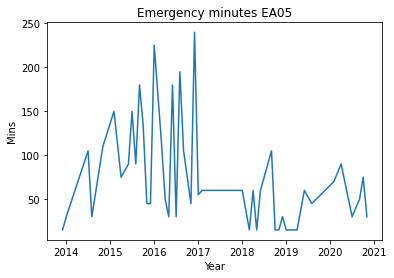

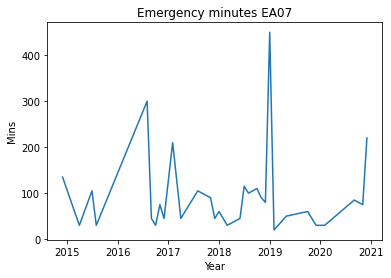

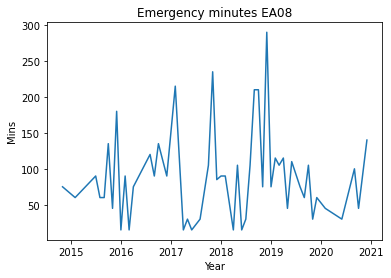

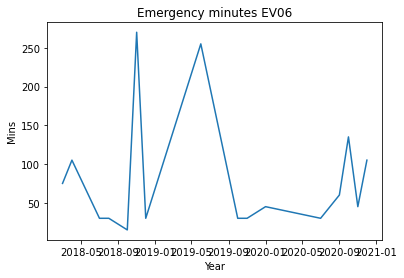

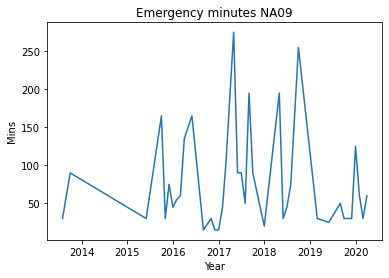

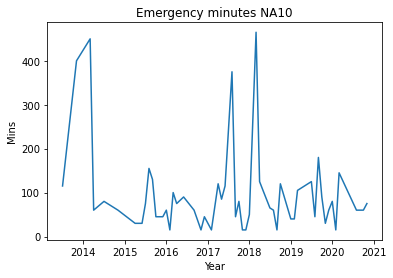

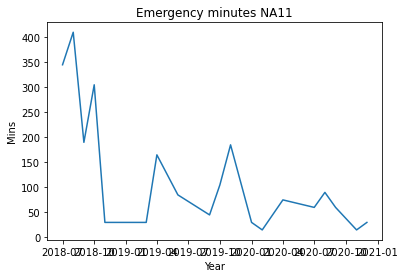

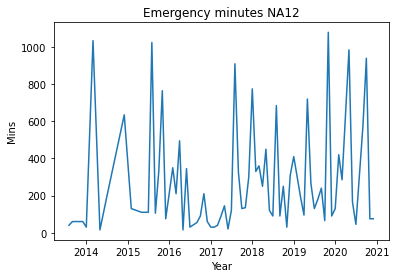

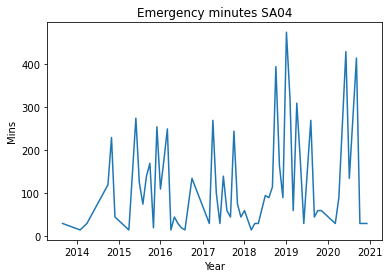

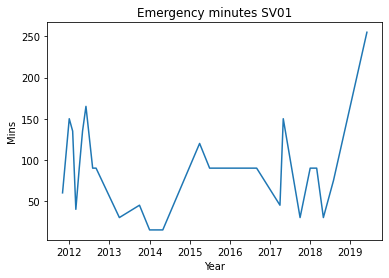

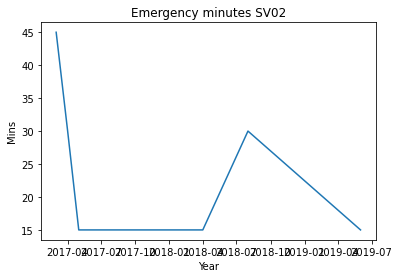

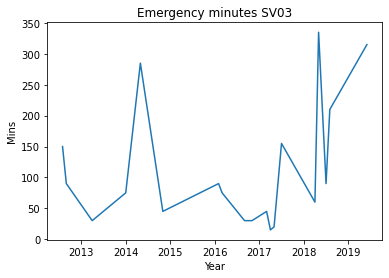

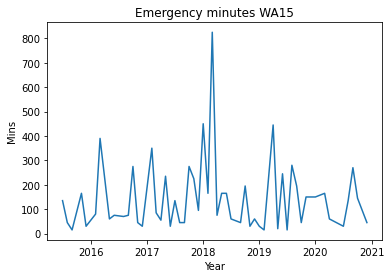

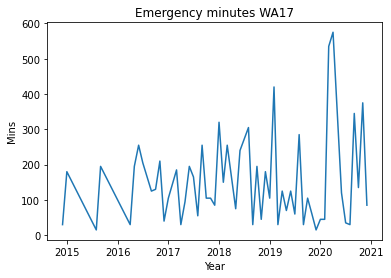

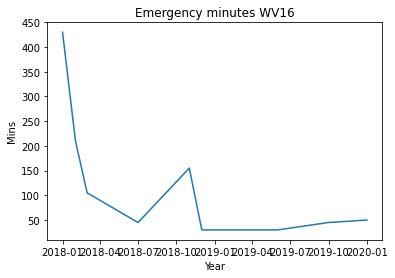

In [83]:
units = df_E1_mins_unit['TxUnit_x'].unique()
for u in units:
    y = df_E1_mins_unit[df_E1_mins_unit['TxUnit_x']==u]['Duration']
    x = df_E1_mins_unit[df_E1_mins_unit['TxUnit_x']==u]['YearMonth']

    plt.plot(x, y)
    plt.xlabel('Year')
    plt.ylabel('Mins')
    plt.title('Emergency minutes '+u)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()